# What Are The Yearly Trends in Service Requests?

#### Methodology
1. Create a new DataFrame containing the top 5 requested service types with year-month.
2. Visualize the trends using a yearly line chart.
3. Explore the yearly distribution of the top 5 requested service type with horizontal stacked bar chart.

#### Import Libraries and Create Date Columns

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from matplotlib.ticker import PercentFormatter, FuncFormatter

df_original = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\8_Service_request\Customer_Service_Requests.csv', dtype={12 : object})

sns.set_style('ticks')

# Remove unnecessary columns
df = df_original[['Service Request Number', 'Service Request Type', 'City Department',
       'Created Date', 'Method Received', 'Status',  'ZIP Code']].copy()
df.loc[:,'date'] =pd.to_datetime(df['Created Date'])

In [3]:
# Prepare time data to analyse
df['year']=df['date'].dt.to_period('M')
df['Y']=df['date'].dt.year

#### Yearly Trend of Top 5 Service Request Types
I made a list of top 5 service request types and created a pivot table of yearly service request count. Also filtered the table with top 5 requested service types to show trends.

In [4]:
# From 0_Intro.ipynb
df_type = df.groupby('Service Request Type')['Service Request Number'].count().reset_index().sort_values(by='Service Request Number',ascending=False)
# Make list of top 5 service request type
top5 = df_type['Service Request Type'].head().tolist() 

In [5]:
df_pivot =df.pivot_table(values='Service Request Number',aggfunc='count',index='year', columns='Service Request Type')
df_pivot = df_pivot[top5]

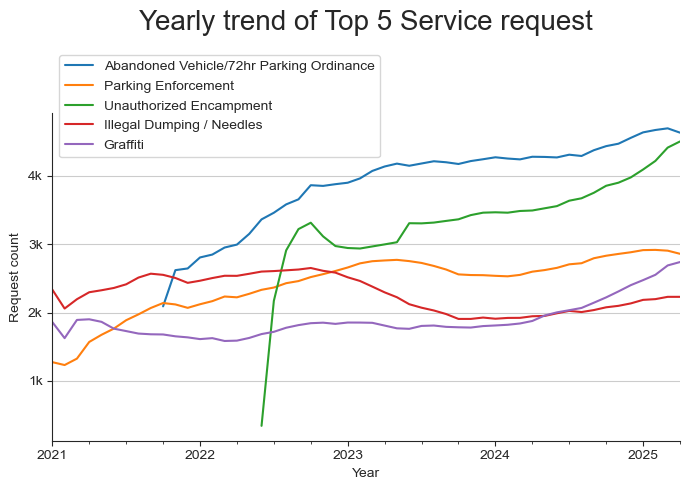

In [7]:
# Plot with previous 12 months average 
df_pivot_smooth =df_pivot.rolling(window=12, min_periods=1).mean()
df_pivot_smooth.plot(figsize=(7,5))

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)
sns.despine()
plt.legend(loc='upper left',  bbox_to_anchor=(0, 1.2))
plt.title('Yearly trend of Top 5 Service request',fontsize=20, pad=60)
plt.ylabel('Request count')
plt.xlabel('Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Insight
- Reports of Unauthorized Encampment have surged since mid-2022 and it is nearly th most top request type by 2025.
- Parking issues have increased steadily, especially long-term parking reports have been doubled by 2025.


#### Yearly Distribution of Top 5 Requested Service Types
 To visualize proportion, I created a pivot table and filtered with top 5 request types. 

In [204]:
# create pivot table of top 5 requested service per year
df_type =df.pivot_table(values='Service Request Number',aggfunc='count',index='Y', columns='Service Request Type')[top5]
df_type['sum']=df_type.sum(axis=1)
df_type = df_type.reset_index()
df_type

Service Request Type,Y,Abandoned Vehicle/72hr Parking Ordinance,Parking Enforcement,Unauthorized Encampment,Illegal Dumping / Needles,Graffiti,sum
0,2021,7936.0,24829.0,NaN,29218.0,19649.0,81632.0
1,2022,46537.0,31298.0,20813.0,31013.0,22015.0,151676.0
2,2023,50916.0,30564.0,41536.0,23124.0,21629.0,167769.0
3,2024,54668.0,34588.0,47723.0,25609.0,28812.0,191400.0
4,2025,17479.0,10326.0,18857.0,8339.0,11688.0,66689.0


In [205]:
# Convert to percentage
for top in top5 :
    df_type[top]=df_type[top].div(df_type['sum']/100)
df_type

Service Request Type,Y,Abandoned Vehicle/72hr Parking Ordinance,Parking Enforcement,Unauthorized Encampment,Illegal Dumping / Needles,Graffiti,sum
0,2021,9.721678,30.415768,NaN,35.792336,24.070218,81632.0
1,2022,30.681848,20.634774,13.722013,20.446874,14.514491,151676.0
2,2023,30.348873,18.217907,24.757852,13.783238,12.892131,167769.0
3,2024,28.562173,18.071055,24.933647,13.379833,15.053292,191400.0
4,2025,26.209720,15.483813,28.276028,12.504311,17.526129,66689.0


In [ ]:
df_type.set_index('Y',inplace=True)
df_type.drop(labels='sum',axis=1,inplace=True)

In [207]:
df_type.fillna(0,inplace=True)

Visualize as a stacked horizontal bar chart per year, display percentage of each service request type

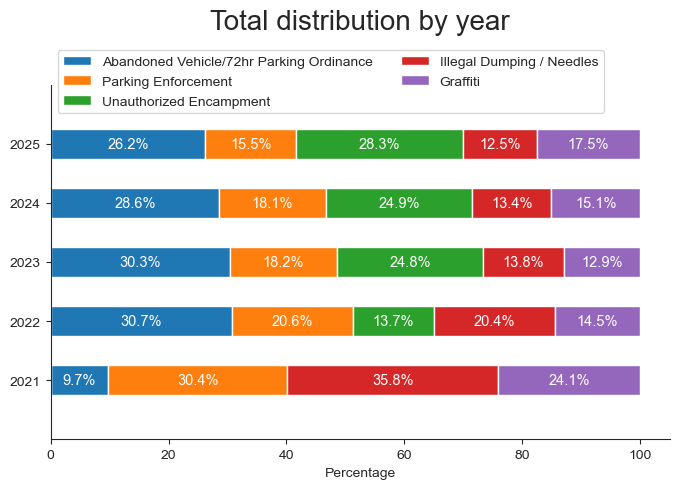

In [ ]:
ax = df_type.plot(kind='barh', stacked=True,figsize=(7,5))

plt.legend(ncol=2, bbox_to_anchor=(0, 0.9),loc='lower left')
plt.title('Total distribution by year',fontsize=20,pad=40)

for container in ax.containers:
     labels = [f'{v.get_width():.1f}%' if v.get_width() > 0 else '' for v in container]
     ax.bar_label(container, labels=labels,label_type='center', fontsize=10.5, color='white')

plt.ylabel('')
sns.despine() 
plt.ylim(-1,5)
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

Illegal dumping/ needles request proportion has been decreasing each year, in contrast, unauthorized encampment continues to grow and is becoming significant issue.